In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from scipy.stats import t


## Grid search 1

In [3]:
# Read simulation outputs

# SSE
file = open('../output/tuning/nom_output_m_error_revised_1.obj', 'rb')
nom_error1 = pickle.load(file)
nom_error1_df = pd.DataFrame(nom_error1)

file = open('../output/tuning/com_output_m_error_revised_1.obj', 'rb')
com_error1 = pickle.load(file)
com_error1_df = pd.DataFrame(com_error1)

# individual output
file = open('../output/tuning/nom_output_child_revised_1.obj', 'rb')
nom_child1 = pickle.load(file)

file = open('../output/tuning/com_output_child_revised_1.obj', 'rb')
com_child1 = pickle.load(file)


In [4]:
# SSE of all parameter combinations
nom_error1_df = nom_error1_df.round(decimals=3)
nom_error1_df = nom_error1_df.pivot(index=0, columns=1,values=2)

com_error1_df = com_error1_df.round(decimals=3)
com_error1_df = com_error1_df.pivot(index=0, columns=1,values=2)


In [5]:
# Proportion of participants changing PAL in nomination network

proplist = []

for dat in nom_child1:
    datlist = []
    for key in dat:
        datlist.append(dat[key])

    res_ind = pd.concat(datlist, axis=1)
    dif = res_ind.iloc[1999] - res_ind.iloc[0]
    proplist.append(dif[dif != 0].count()/dif.count())

prop = pd.DataFrame(proplist)
result_prop = pd.DataFrame(nom_error1)
result_prop["prop"] = prop

nom_prop_df = pd.DataFrame(result_prop).pivot(index=0, columns=1,values="prop")

In [6]:
# Proportion of participants changing PAL in communication network

proplist = []

for dat in com_child1:
    datlist = []
    for key in dat:
        datlist.append(dat[key])

    res_ind = pd.concat(datlist, axis=1)
    dif = res_ind.iloc[1999] - res_ind.iloc[0]
    proplist.append(dif[dif != 0].count()/dif.count())

prop = pd.DataFrame(proplist)
result_prop = pd.DataFrame(com_error1)
result_prop["prop"] = prop

com_prop_df = pd.DataFrame(result_prop).pivot(index=0, columns=1,values="prop")

/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


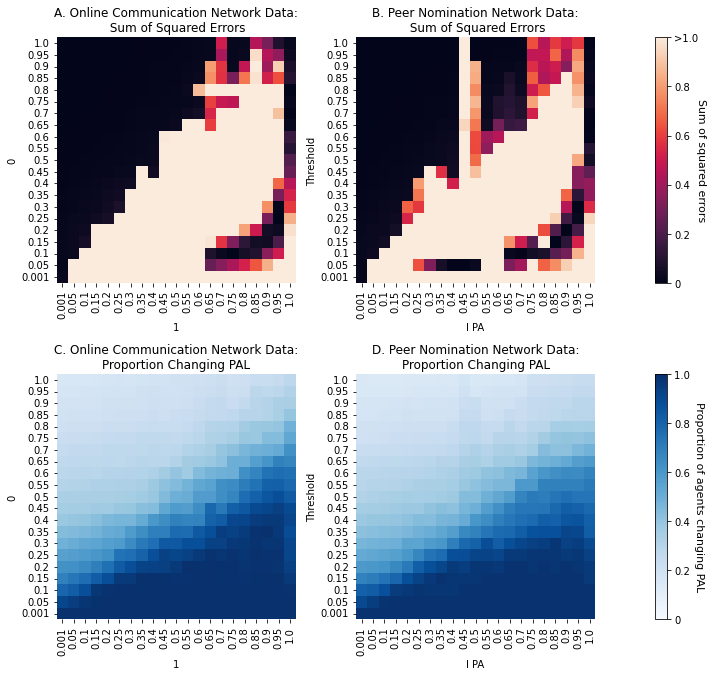

In [7]:
# plot heatmap of grid search 1

fig, axs = plt.subplots(2, 3, figsize=(10,9.5), gridspec_kw=dict(width_ratios=[1,1,0.05]))
#fig.suptitle('Grid Search (Sum of Squared Errors)')

#kwargs = {'alpha':1,'linewidth':0.5,'linecolor':'k','rasterized':True, 'edgecolor':'k', 'capstyle':'projecting'}
axs[0,0].set_title('A. Online Communication Network Data:\n Sum of Squared Errors')
sns.heatmap(com_error1_df, vmin=0, vmax=1, ax = axs[0,1], cbar=False).invert_yaxis()
axs[0,0].set_xlabel('I PA')
axs[0,0].set_ylabel('Threshold')

axs[0,1].set_title('B. Peer Nomination Network Data:\n Sum of Squared Errors')
sns.heatmap(nom_error1_df, vmin=0, vmax=1, ax = axs[0,0], cbar=False).invert_yaxis()
axs[0,1].set_xlabel('I PA')
axs[0,1].set_ylabel('Threshold')

cbar = fig.colorbar(axs[0,1].collections[0], cax=axs[0,2])
cbar.ax.set_yticklabels(['0','0.2','0.4','0.6', '0.8', '>1.0 '])
cbar.set_label('Sum of squared errors', fontsize=11, rotation=270)

axs[1,0].set_title('C. Online Communication Network Data:\nProportion Changing PAL')
sns.heatmap(com_prop_df, vmin=0, vmax=1, ax = axs[1,1], cmap="Blues", cbar=False).invert_yaxis()
axs[1,0].set_xlabel('I PA')
axs[1,0].set_ylabel('Threshold')

axs[1,1].set_title('D. Peer Nomination Network Data:\nProportion Changing PAL')
sns.heatmap(nom_prop_df, vmin=0, vmax=1, ax = axs[1,0], cmap="Blues", cbar=False).invert_yaxis()
axs[1,1].set_xlabel('I PA')
axs[1,1].set_ylabel('Threshold')

cbar2 = fig.colorbar(axs[1,1].collections[0], cax=axs[1,2])
cbar2.ax.set_yticklabels(['0','0.2','0.4','0.6', '0.8', '1.0   '])
cbar2.set_label('Proportion of agents changing PAL', fontsize=11, rotation=270)

plt.tight_layout()

# Save plot
plt.savefig('../output/plots/grid_search1_com_nom.eps', bbox_inches='tight', format='eps', dpi=500)
plt.show()


## Grid search 2

In [13]:
# Read tuning model outputs

file = open('../output/tuning/nom_output_m_error_revised_2.obj', 'rb')
nom_error2 = pickle.load(file)
nom_error2_df = pd.DataFrame(nom_error2)

file = open('../output/tuning/com_output_m_error_revised_2.obj', 'rb')
com_error2 = pickle.load(file)
com_error2_df = pd.DataFrame(com_error2)


In [14]:
# Read parameter combinations selected.
pars_nomination = pd.read_csv('../output/opt_pars_m_nomination_revised.csv', sep=',', header=0)
pars_communication = pd.read_csv('../output/opt_pars_m_communication_revised.csv', sep=',', header=0)


In [15]:
# SSE of all parameter combinations
nom_error2_df = nom_error2_df.round(decimals=4)
nom_error2_df = nom_error2_df.pivot(index=0, columns=1,values=2)

com_error2_df = com_error2_df.round(decimals=4)
com_error2_df = com_error2_df.pivot(index=0, columns=1,values=2)


In [16]:

com_error2_df

1,0.0025,0.0050,0.0075,0.0100,0.0125,0.0150,0.0175,0.0200,0.0225,0.0250,0.0275,0.0300,0.0325,0.0350,0.0375,0.0400,0.0425,0.0450,0.0475,0.0500
0,,,,,,,,,,,,,,,,,,,,
0.0025,0.0063,2.3468,1.5761,0.6139,0.1946,0.0273,0.0005,0.0251,0.0848,0.1523,0.2160,0.2877,0.3183,0.4332,0.4981,0.5372,0.5934,0.6191,0.6859,0.7063
0.0050,0.0025,0.0015,2.6593,4.5711,3.5941,2.3324,1.1151,0.7654,0.2859,0.1429,0.0501,0.0150,0.0029,0.0024,0.0197,0.0498,0.0877,0.0885,0.1551,0.1601
0.0075,0.0006,0.0002,0.1551,4.3969,6.1901,5.1451,3.9444,3.0146,2.1287,1.2520,1.0035,0.6766,0.4748,0.3661,0.1524,0.1499,0.0456,0.0507,0.0035,0.0041
0.0100,0.0000,0.0002,0.0021,1.7027,3.3587,5.6200,5.8371,4.5577,4.3445,3.2847,2.6203,2.2543,1.4410,1.5051,0.7693,0.7389,0.4437,0.4458,0.3049,0.2668
0.0125,0.0005,0.0009,0.0022,0.0032,0.5939,1.0664,3.9655,5.7603,5.4285,3.7314,4.2606,4.8514,2.5678,3.1197,1.9299,1.8854,1.4493,1.4993,1.0628,0.7956
0.0150,0.0016,0.0025,0.0036,0.0045,0.0076,0.2949,3.5113,5.2251,5.6302,4.9649,6.0178,6.3258,4.6186,4.9128,3.4802,3.4403,2.6080,2.7549,2.1212,1.7977
0.0175,0.0028,0.0038,0.0046,0.0063,0.0082,0.2815,1.0241,5.2382,4.0501,5.4025,7.8616,7.0483,6.3178,6.3334,4.7137,4.8361,3.5646,4.1166,3.6312,2.9114
0.0200,0.0040,0.0042,0.0054,0.0068,0.0080,0.0107,0.3545,1.9358,2.6294,5.5351,6.4985,8.2452,6.8957,5.9536,5.8337,7.2399,4.4210,5.0633,4.9025,4.1270
0.0225,0.0052,0.0056,0.0067,0.0081,0.0100,0.0124,0.4233,0.0209,1.0328,3.8636,9.0421,9.1468,8.5976,5.5168,5.8208,8.2717,4.9135,7.9274,5.9538,5.6286


/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


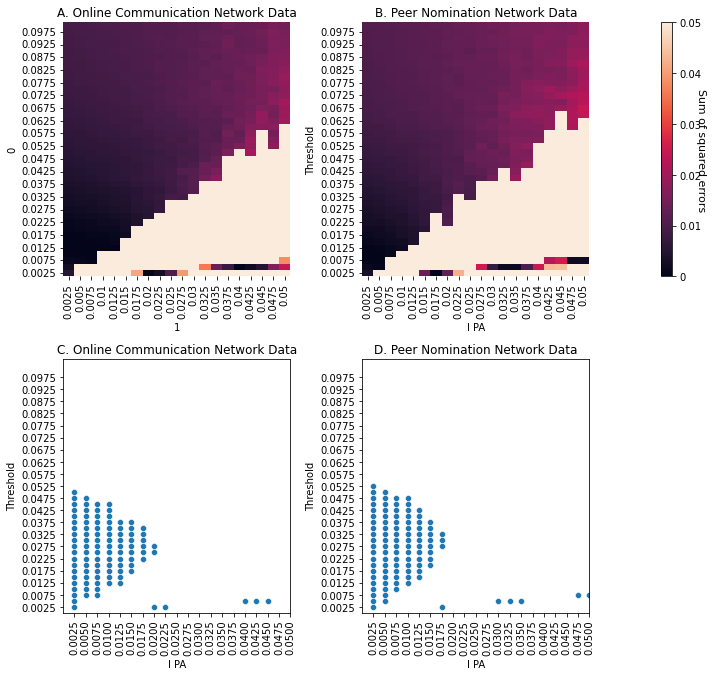

In [17]:
# plot of grid search 2

fig, axs = plt.subplots(2, 3, figsize=(10,9.5), gridspec_kw=dict(width_ratios=[1,1,0.05]))

#kwargs = {'alpha':1,'linewidth':0.5,'linecolor':'k','rasterized':True, 'edgecolor':'k', 'capstyle':'projecting'}
axs[0,0].set_title('A. Online Communication Network Data')
sns.heatmap(com_error2_df, vmin=0, vmax=0.1, ax = axs[0,1], cbar=False).invert_yaxis()
axs[0,0].set_xlabel('I PA')
axs[0,0].set_ylabel('Threshold')

axs[0,1].set_title('B. Peer Nomination Network Data')
sns.heatmap(nom_error2_df, vmin=0, vmax=0.1, ax = axs[0,0], cbar=False).invert_yaxis()
axs[0,1].set_xlabel('I PA')
axs[0,1].set_ylabel('Threshold')

cbar = fig.colorbar(axs[0,1].collections[0], cax=axs[0,2])
cbar.ax.set_yticklabels(['0','0.01','0.02','0.03','0.04','0.05','0.06','0.07','0.08','0.09','>0.10 '])
cbar.set_label('Sum of squared errors', fontsize=11, rotation=270)

# best fitting parameter combinations
axs[1,0].set_title('C. Online Communication Network Data')
sns.scatterplot(data = pars_communication, x = "ipa", y = "threshold",  palette='crest', ax=axs[1,1])
axs[1,0].set_xlabel('I PA')
axs[1,0].set_ylabel('Threshold')
axs[1,0].set_yticks([0.0025,0.0075,0.0125,0.0175,0.0225,0.0275,0.0325,0.0375,0.0425,0.0475,
                     0.0525,0.0575,0.0625,0.0675,0.0725,0.0775,0.0825,0.0875,0.0925,0.0975])
axs[1,0].set_xticks([0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02,0.0225,0.025,0.0275,
                     0.03,0.0325,0.035,0.0375,0.04,0.0425,0.045,0.0475,0.05])
axs[1,0].tick_params(axis='x', rotation=90)
axs[1,0].set_ylim([0.0, 0.105])
axs[1,0].set_xlim([0.0, 0.05])

axs[1,1].set_title('D. Peer Nomination Network Data')
sns.scatterplot(data = pars_nomination, x = "ipa", y = "threshold", palette = 'crest', ax=axs[1,0])
axs[1,1].set_xlabel('I PA')
axs[1,1].set_ylabel('Threshold')
axs[1,1].set_yticks([0.0025,0.0075,0.0125,0.0175,0.0225,0.0275,0.0325,0.0375,0.0425,0.0475,
                     0.0525,0.0575,0.0625,0.0675,0.0725,0.0775,0.0825,0.0875,0.0925,0.0975])
axs[1,1].set_xticks([0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02,0.0225,0.025,0.0275,
                     0.03,0.0325,0.035,0.0375,0.04,0.0425,0.045,0.0475,0.05])
axs[1,1].tick_params(axis='x', rotation=90)
axs[1,1].set_ylim([0.0, 0.105])
axs[1,1].set_xlim([0.0, 0.05])
#axs[1,1].legend(loc='right', title="SSE") hue = 'error',


axs[1,2].remove()

plt.tight_layout()

# Save plot
plt.savefig('../output/plots/grid_search2_com_nom.eps', bbox_inches='tight', format='eps', dpi=500)
plt.show()




## Output of tuned model

In [18]:
# Plot of mean output per run

file = open('../output/tuning/nom_output_cl_revised_3_1.obj', 'rb')
nom = pickle.load(file)
nom_df = pd.DataFrame(nom)

file = open('../output/tuning/com_output_cl_revised_3_1.obj', 'rb')
com = pickle.load(file)
com_df = pd.DataFrame(com)

input_args = json.loads(open('../input/simulation.json').read())
df_pal = pd.read_csv("../data/Fitbit_Imputation_FINAL.csv", sep=';', header=0, encoding='latin-1')


In [19]:
# Read data
df_pal = df_pal[df_pal['Class'].isin(input_args['classes'])]
df_pal = df_pal.groupby(['Child', 'Class', 'Wave']).mean()['Steps'].reset_index()
# normalize the number of steps: divided by 10,000
df_pal.Steps = df_pal.Steps * 0.0001
df_pal = df_pal.pivot(index='Child', columns='Wave')['Steps']

df_pal

Wave,1,2,3,4,5,6,7
Child,,,,,,,
1605,0.659440,0.536140,0.411220,0.645267,0.674440,0.839840,0.779367
1606,0.685767,0.783220,0.717233,0.414233,0.864100,0.892600,1.071067
1607,0.996140,1.188520,0.771050,0.631375,1.042980,0.172825,1.245550
1608,1.143800,1.130540,0.813220,1.056350,0.782900,0.832433,1.001500
1609,0.555740,0.416067,0.593700,0.581880,0.627525,0.778840,0.413933
...,...,...,...,...,...,...,...
6086,NaN,NaN,NaN,NaN,0.837500,0.836200,0.787200
6088,NaN,NaN,NaN,NaN,0.721320,0.818840,0.850733
6089,NaN,NaN,NaN,NaN,0.765500,0.702440,0.834733


In [20]:
m = df_pal.mean()
s = df_pal.std()
dof = len(df_pal)-1
t_crit = np.abs(t.ppf((0.05)/2,dof))
# length
s_df = pd.DataFrame({'Wave': [1,2,3,4,5,6,7],
                     'len': [df_pal[1].count(), df_pal[2].count(), df_pal[3].count(), df_pal[4].count(),
                             df_pal[5].count(), df_pal[6].count(), df_pal[7].count()]})
s_df = s_df.set_index('Wave')
#Error
error = s*t_crit/np.sqrt(len(df_pal))
error2 = s*t_crit/np.sqrt(s_df['len'])
lower = m-error2
upper = m+error2

data_df = pd.DataFrame({'Day': [0, 60, 90, 365, 730, 790, 820],
                   'Mean': m, 'Lower': lower, 'Upper': upper, 'Error': error2})

data_df = data_df.set_index('Day')



In [21]:
yr1 = df_pal[1]
yr2 = df_pal[4]
yr3 = (df_pal[5] + df_pal[6] + df_pal[7])/3
df_pal_yr = pd.DataFrame({'Year1': yr1, 'Year2': yr2, 'Year3': yr3})

m = df_pal_yr.mean()
med = df_pal_yr.median()
s = df_pal_yr.std()
dof = len(df_pal) - 1
t_crit = np.abs(t.ppf((0.05) / 2, dof))
# length
s_df = pd.DataFrame({'Year': ['Year1', 'Year2', 'Year3'],
                     'len': [df_pal_yr['Year1'].count(), df_pal_yr['Year2'].count(),
                             df_pal_yr['Year3'].count()]})
s_df = s_df.set_index('Year')

#Error
#error = s * t_crit / np.sqrt(len(df_pal))
error = s * t_crit / np.sqrt(s_df['len'])
lower = m - error
upper = m + error

data_df = pd.DataFrame({'Day': [0, 365, 730],
                        'Mean': m, 'Lower': lower, 'Upper': upper, 'Error': error, 'Median': med})

data_df = data_df.set_index('Day')
data_df


,Mean,Lower,Upper,Error,Median
Day,,,,,
0,0.924309,0.847700,1.000919,0.076610,0.867760
365,1.009432,0.939078,1.079786,0.070354,0.953123
730,0.965585,0.940026,0.991145,0.025559,0.951600


In [22]:
avg_by_run_nom = pd.DataFrame({'Day': np.arange(0,1999)})
for run in range(len(pars_nomination)):
    avg_by_run_nom[f'y{run+1}'] = pd.DataFrame(nom[run]).mean(axis=1)

avg_by_run_nom = avg_by_run_nom.set_index('Day')
avg_by_run_nom

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y91,y92,y93,y94,y95,y96,y97,y98,y99,y100
Day,,,,,,,,,,,,,,,,,,,,,
0,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,...,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789
1,0.907032,0.901344,0.907411,0.906653,0.906613,0.907418,0.907047,0.907005,0.906274,0.906676,...,0.907362,0.907512,0.907333,0.906530,0.905496,0.907111,0.907651,0.906147,0.907181,0.906176
2,0.906262,0.894402,0.907026,0.905517,0.905435,0.907041,0.906305,0.906221,0.904738,0.905578,...,0.906939,0.907253,0.906957,0.905585,0.903666,0.906580,0.907525,0.904966,0.906675,0.905105
3,0.905495,0.886050,0.906642,0.904395,0.904261,0.906670,0.905560,0.905447,0.903312,0.904490,...,0.906522,0.907002,0.906632,0.904944,0.901994,0.906081,0.907414,0.903750,0.906277,0.903942
4,0.904748,0.877655,0.906263,0.903267,0.903144,0.906304,0.904826,0.904665,0.901881,0.903437,...,0.906110,0.906824,0.906353,0.904339,0.900556,0.905809,0.907318,0.902636,0.906003,0.902935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.928360,0.931847,0.924388,0.932202,0.921521,0.934871,0.938689,0.915587,0.940976,0.942061,...,0.856558,1.000102,1.000446,1.000716,1.000778,1.001008,1.001040,1.001313,1.001990,1.002047
1995,0.928360,0.931425,0.924388,0.932202,0.921521,0.934871,0.938689,0.915587,0.940976,0.942061,...,0.856558,1.000102,1.000446,1.000716,1.000778,1.001008,1.001040,1.001313,1.001990,1.002047
1996,0.928360,0.931499,0.924388,0.932202,0.921521,0.934871,0.938689,0.915587,0.940976,0.942061,...,0.856558,1.000102,1.000446,1.000716,1.000778,1.001008,1.001040,1.001313,1.001990,1.002047


In [23]:
avg_by_run_com = pd.DataFrame({'Day': np.arange(0,1999)})
for run in range(len(pars_nomination)):
    avg_by_run_com[f'y{run+1}'] = pd.DataFrame(com[run]).mean(axis=1)

avg_by_run_com = avg_by_run_com.set_index('Day')
avg_by_run_com

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y91,y92,y93,y94,y95,y96,y97,y98,y99,y100
Day,,,,,,,,,,,,,,,,,,,,,
0,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,...,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789,0.907789
1,0.907318,0.906813,0.906847,0.907344,0.904146,0.907301,0.906898,0.906793,0.907369,0.906376,...,0.906487,0.905641,0.901812,0.905641,0.907641,0.907482,0.905948,0.906985,0.906628,0.906138
2,0.906850,0.905876,0.905921,0.906904,0.900527,0.906813,0.906020,0.905807,0.906959,0.905031,...,0.905488,0.903748,0.895814,0.903856,0.907509,0.907221,0.904446,0.906511,0.905778,0.904861
3,0.906381,0.904967,0.905035,0.906466,0.896772,0.906344,0.905150,0.904831,0.906561,0.903718,...,0.904617,0.901990,0.890289,0.902193,0.907392,0.907002,0.903086,0.906088,0.905098,0.903751
4,0.905932,0.904041,0.904148,0.906024,0.892861,0.905877,0.904311,0.903876,0.906169,0.902418,...,0.903856,0.900610,0.885318,0.900956,0.907284,0.906796,0.901848,0.905660,0.904374,0.902793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.929440,0.919457,0.937104,0.943798,0.904753,0.911023,0.949256,0.900667,0.956335,0.960284,...,1.014219,1.014313,1.019863,1.014977,1.015235,1.015262,1.015464,1.015828,1.016137,1.016391
1995,0.929440,0.919457,0.937104,0.943798,0.905062,0.911023,0.949256,0.900667,0.956335,0.960284,...,1.014219,1.014313,1.019528,1.014977,1.015235,1.015262,1.015464,1.015828,1.016137,1.016391
1996,0.929440,0.919457,0.937104,0.943798,0.904697,0.911023,0.949256,0.900667,0.956335,0.960284,...,1.014219,1.014313,1.019808,1.014977,1.015235,1.015262,1.015464,1.015828,1.016137,1.016391


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


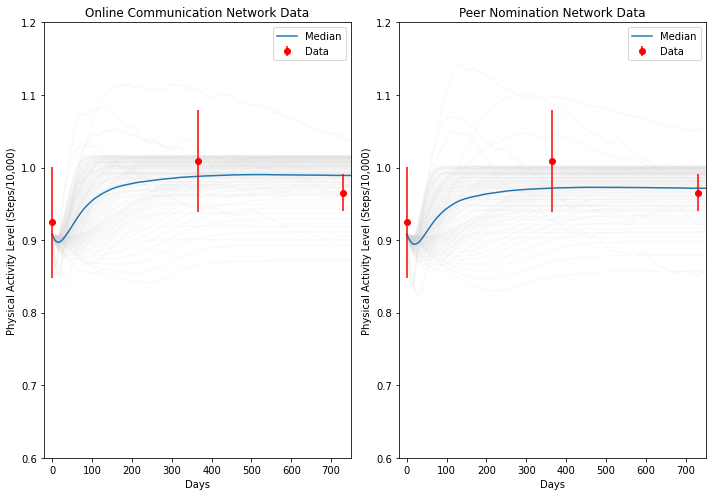

In [24]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))

ax1.set_title('Online Communication Network Data')
ax1.set_ylim([0.6, 1.2])
ax1.set_xlim([-20,750])
ax1.set_ylabel('Physical Activity Level (Steps/10,000)')
ax1.set_xlabel('Days')
ax1.plot(avg_by_run_com, color='lightgrey', alpha=0.1)
ax1.plot(avg_by_run_com.mean(axis=1), label="Median")
ax1.errorbar(x=data_df.index, y=data_df['Mean'], yerr=data_df['Error'], fmt='ro', label='Data')
ax1.legend()

ax2.set_title('Peer Nomination Network Data')
ax2.set_ylim([0.6, 1.2])
ax2.set_xlim([-20,750])
ax2.set_ylabel('Physical Activity Level (Steps/10,000)')
ax2.set_xlabel('Days')
#for i in range(100):
#    ax1.plot(avg_by_run_nom.index, avg_by_run_nom[f'y{i+1}'], color='lightgrey', alpha=0.3)
ax2.plot(avg_by_run_nom, color='lightgrey', alpha=0.1)
ax2.plot(avg_by_run_nom.mean(axis=1), label="Median")
ax2.errorbar(x=data_df.index, y=data_df['Mean'], yerr=data_df['Error'], fmt='ro', label='Data')
ax2.legend()

fig.tight_layout()

# Save plot
fig.savefig('../output/plots/grid_search2_runs_com_nom.eps', bbox_inches='tight', format='eps', dpi=500)
fig.show()


In [14]:
avg_by_run_nom

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,...,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637
1,0.907292,0.907750,0.907740,0.908189,0.908194,0.907307,0.906844,0.907729,0.907275,0.908213,...,0.907714,0.907322,0.905557,0.908300,0.907898,0.907953,0.907103,0.908486,0.908131,0.907714
2,0.905955,0.906852,0.906847,0.907747,0.907747,0.905975,0.905082,0.906826,0.905923,0.907790,...,0.906848,0.906003,0.902876,0.908000,0.907268,0.907353,0.905655,0.908339,0.907702,0.906926
3,0.904661,0.905981,0.905957,0.907295,0.907298,0.904772,0.903367,0.905927,0.904603,0.907360,...,0.906174,0.905025,0.900594,0.907709,0.906721,0.906869,0.904522,0.908197,0.907331,0.906249
4,0.903366,0.905179,0.905102,0.906845,0.906854,0.903574,0.901777,0.905047,0.903297,0.906939,...,0.905560,0.904186,0.898419,0.907452,0.906234,0.906498,0.903614,0.908058,0.906954,0.905666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.917614,0.924621,0.913385,0.910047,0.922077,0.928197,0.925639,0.899813,0.905669,0.932265,...,0.994233,0.989851,0.991807,0.995986,0.995069,0.996190,0.992473,0.996737,0.997234,0.995916
1996,0.917614,0.924621,0.913385,0.910047,0.922077,0.928197,0.925639,0.899813,0.905669,0.932265,...,0.994233,0.989851,0.991807,0.995986,0.995069,0.996190,0.992473,0.996737,0.997234,0.995916
1997,0.917614,0.924621,0.913385,0.910047,0.922077,0.928197,0.925639,0.899813,0.905669,0.932265,...,0.994233,0.989851,0.991807,0.995986,0.995069,0.996190,0.992473,0.996737,0.997234,0.995916
1998,0.917614,0.924621,0.913385,0.910047,0.922077,0.928197,0.925639,0.899813,0.905669,0.932265,...,0.994233,0.989851,0.991807,0.995986,0.995069,0.996190,0.992473,0.996737,0.997234,0.995916


In [9]:
pd.DataFrame(com[0])

,78.0,81.0,100.0,124.0,125.0,256.0,258.0,261.0,262.0,263.0,...,273.0,292.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0
0,0.960245,0.967677,0.966309,0.779903,0.915949,0.902567,0.776171,1.031839,0.853125,0.931897,...,0.957903,0.902760,0.905814,0.907797,0.918891,0.937198,0.988239,0.923998,0.921906,0.820202
1,0.959651,0.967160,0.965901,0.778477,0.915444,0.901130,0.775434,1.030328,0.852383,0.929879,...,0.956724,0.902037,0.904442,0.906475,0.918669,0.936299,0.988161,0.922528,0.920567,0.819232
2,0.959079,0.966667,0.965515,0.777070,0.915173,0.900002,0.774715,1.028841,0.851661,0.927883,...,0.955570,0.901338,0.903321,0.905176,0.918470,0.935420,0.988109,0.921080,0.919252,0.818167
3,0.958527,0.966195,0.965150,0.775683,0.914924,0.898893,0.774015,1.027640,0.851267,0.925911,...,0.954439,0.900660,0.901988,0.903899,0.918292,0.934561,0.988081,0.919652,0.917959,0.817292
4,0.958271,0.965747,0.964807,0.774315,0.914697,0.897356,0.773334,1.026461,0.850891,0.923961,...,0.953332,0.900006,0.900310,0.902645,0.918135,0.933723,0.988078,0.918063,0.916877,0.816449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.938353,0.944426,0.958908,0.888029,1.050015,0.743435,0.747544,1.214160,0.916280,0.866948,...,1.002958,1.001949,0.989959,0.812635,0.891534,0.898594,0.972932,0.829309,0.687828,0.903997
1996,0.938353,0.944426,0.958908,0.888029,1.050015,0.743435,0.747544,1.214160,0.916280,0.866948,...,1.002958,1.001949,0.989959,0.812635,0.891534,0.898594,0.972932,0.829309,0.687828,0.903997
1997,0.938353,0.944426,0.958908,0.888029,1.050015,0.743435,0.747544,1.214160,0.916280,0.866948,...,1.002958,1.001949,0.989959,0.812635,0.891534,0.898594,0.972932,0.829309,0.687828,0.903997
1998,0.938353,0.944426,0.958908,0.888029,1.050015,0.743435,0.747544,1.214160,0.916280,0.866948,...,1.002958,1.001949,0.989959,0.812635,0.891534,0.898594,0.972932,0.829309,0.687828,0.903997


In [10]:
pd.DataFrame(com[1])

,78.0,81.0,100.0,124.0,125.0,256.0,258.0,261.0,262.0,263.0,...,273.0,292.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0
0,0.960245,0.967677,0.966309,0.779903,0.915949,0.902567,0.776171,1.031839,0.853125,0.931897,...,0.957903,0.902760,0.905814,0.907797,0.918891,0.937198,0.988239,0.923998,0.921906,0.820202
1,0.959948,0.967419,0.966105,0.779323,0.915803,0.901993,0.775803,1.031216,0.852754,0.930888,...,0.957313,0.902399,0.905128,0.907136,0.918780,0.936748,0.988200,0.923263,0.921237,0.819803
2,0.959657,0.967166,0.965906,0.778747,0.915662,0.901424,0.775438,1.030598,0.852388,0.929884,...,0.956730,0.902043,0.904447,0.906481,0.918675,0.936304,0.988168,0.922534,0.920573,0.819352
3,0.959509,0.966919,0.965713,0.778175,0.915526,0.900860,0.775079,1.029986,0.852027,0.928887,...,0.956153,0.901693,0.903770,0.905831,0.918575,0.935864,0.988141,0.921809,0.920010,0.818905
4,0.959227,0.966678,0.965526,0.777608,0.915396,0.900301,0.774724,1.029380,0.851825,0.927895,...,0.955582,0.901349,0.903098,0.905187,0.918480,0.935430,0.988121,0.921090,0.919358,0.818463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.918663,0.973911,0.970177,0.773153,1.022816,0.768325,0.754925,1.208535,0.923707,0.881346,...,1.011601,0.977549,1.067206,0.877080,0.929506,0.931431,0.974920,0.838246,0.706713,0.907359
1996,0.918663,0.973911,0.970177,0.773153,1.022816,0.768325,0.754925,1.208535,0.923707,0.881346,...,1.011601,0.977549,1.067206,0.877080,0.929506,0.931431,0.974920,0.838246,0.706713,0.907359
1997,0.918663,0.973911,0.970177,0.773153,1.022816,0.768325,0.754925,1.208535,0.923707,0.881346,...,1.011601,0.977549,1.067206,0.877080,0.929506,0.931431,0.974920,0.838246,0.706713,0.907359
1998,0.918663,0.973911,0.970177,0.773153,1.022816,0.768325,0.754925,1.208535,0.923707,0.881346,...,1.011601,0.977549,1.067206,0.877080,0.929506,0.931431,0.974920,0.838246,0.706713,0.907359
